In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('C:\\Users\\benec\\Downloads\\archive (8)\\Inc_Exp_Data.csv')
print(df)

    Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0              5000              8000                  3             2000   
1              6000              7000                  2             3000   
2             10000              4500                  2                0   
3             10000              2000                  1                0   
4             12500             12000                  2             3000   
5             14000              8000                  2                0   
6             15000             16000                  3            35000   
7             18000             20000                  5             8000   
8             19000              9000                  2                0   
9             20000              9000                  4                0   
10            20000             18000                  4             8000   
11            22000             25000                  6            12000   

In [4]:
df=pd.get_dummies(df,columns=['Highest_Qualified_Member'],drop_first=True)
df

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members,Highest_Qualified_Member_Illiterate,Highest_Qualified_Member_Post-Graduate,Highest_Qualified_Member_Professional,Highest_Qualified_Member_Under-Graduate
0,5000,8000,3,2000,64200,1,0,0,0,1
1,6000,7000,2,3000,79920,1,1,0,0,0
2,10000,4500,2,0,112800,1,0,0,0,1
3,10000,2000,1,0,97200,1,1,0,0,0
4,12500,12000,2,3000,147000,1,0,0,0,0
5,14000,8000,2,0,196560,1,0,0,0,0
6,15000,16000,3,35000,167400,1,0,1,0,0
7,18000,20000,5,8000,216000,1,0,0,0,0
8,19000,9000,2,0,218880,1,0,0,0,1
9,20000,9000,4,0,220800,2,0,0,0,1


In [5]:
X=df[['Mthly_HH_Income','Mthly_HH_Expense']]
y=df['Annual_HH_Income']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
svm_model=SVC(kernel='linear')

In [8]:
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [9]:
y_pred=svm_model.predict(X_test)

In [10]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy*100:.2f}%")

Model Accuracy:0.00%


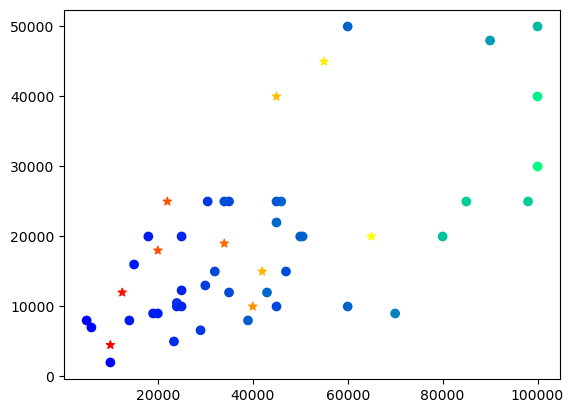

In [11]:
plt.scatter(X_train['Mthly_HH_Income'],X_train['Mthly_HH_Expense'],c=y_train,cmap='winter',label='Training data')
plt.scatter(X_test['Mthly_HH_Income'],X_test['Mthly_HH_Expense'],c=y_test,cmap='autumn',marker='*',label='Test data')

In [12]:
h=15.0
x_min,x_max=X['Mthly_HH_Income'].min()-1,X['Mthly_HH_Income'].max()+1
y_min,y_max=X['Mthly_HH_Expense'].min()-1,X['Mthly_HH_Expense'].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


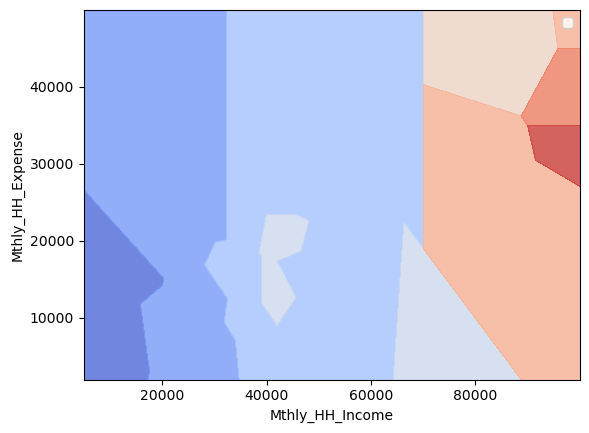

In [14]:
Z=svm_model.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap='coolwarm',alpha=0.8)
plt.xlabel('Mthly_HH_Income')
plt.ylabel('Mthly_HH_Expense')
plt.legend()
plt.show()